In [363]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,chi2

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/automobile.csv'
df = pd.read_csv(url)

In [2]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


# Goal & Steps:

1. Predicting Car Prices:
   - Task: Build a regression model to predict the price (y=price) of cars based on other features in the dataset. This could involve preprocessing the data, selecting relevant features, and implementing `linear regression` and `KNN` algorithm.

2. Feature Engineering:
   - Task: Challenge students to come up with creative ways to engineer new features from the existing ones. For example, they could create a new feature representing the ratio of horsepower to curb weight.

3. Exploratory Data Analysis (EDA):
   - Task: Have students perform in-depth exploratory data analysis to understand the relationships between different features. Visualization tools can be used to communicate their findings effectively.

4. Handling Missing Data:
   - Task: Teach students how to handle missing data in a dataset. They can explore different strategies such as imputation or removal of missing values.

5. Training:
   - Task: Use relavant ML Models

6. Model evaluation:
- Evaluate models and Summarizing their findings. This should include a clear explanation of the model's performance and any insights gained from the analysis.

# Data Visualization

<Axes: xlabel='fuel-type', ylabel='price'>

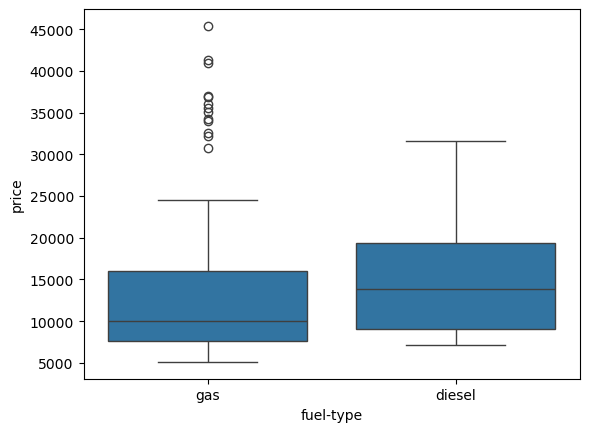

In [603]:
sns.boxplot(x='fuel-type', y='price', data=df)

<Axes: xlabel='num-of-cylinders'>

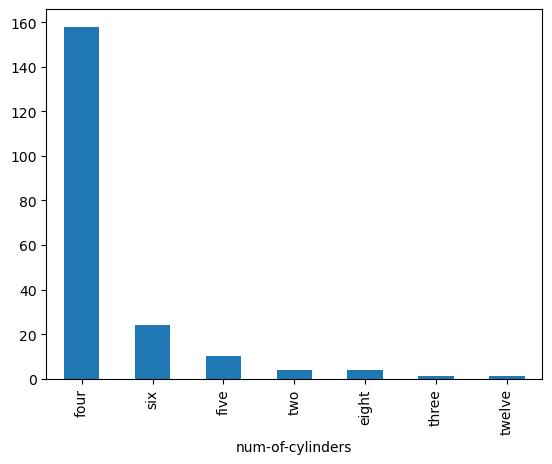

In [601]:
df['num-of-cylinders'].value_counts().plot(kind='bar')

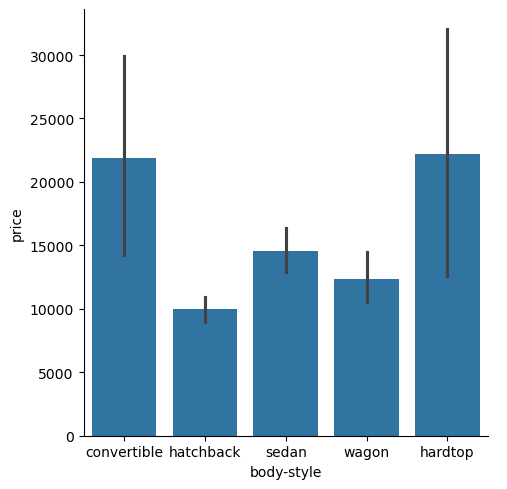

In [585]:
sns.catplot(x=df['body-style'],y=df['price'],kind='bar')

<Axes: ylabel='width'>

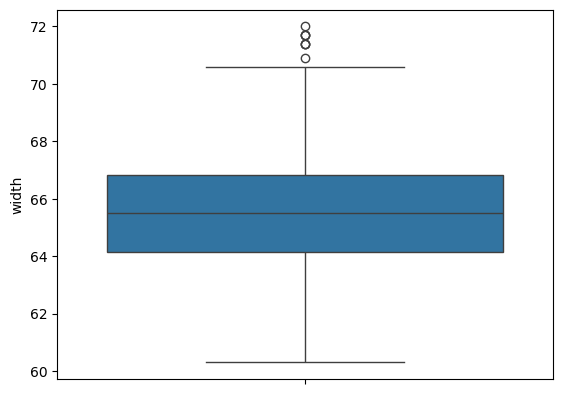

In [723]:
sns.boxplot(df['width'])

<Axes: xlabel='city-mpg', ylabel='price'>

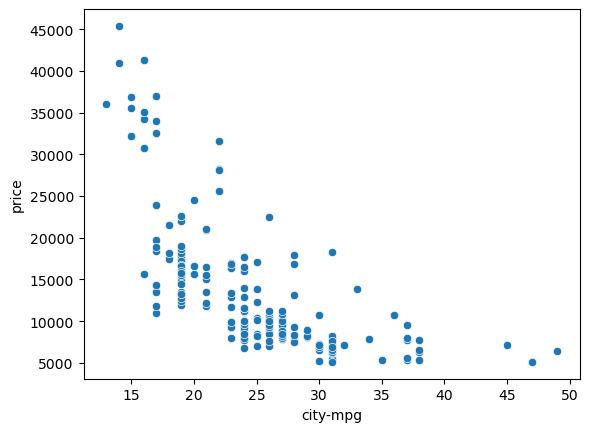

In [621]:
sns.scatterplot(x='city-mpg',y='price',data=df)

<Axes: xlabel='fuel-type', ylabel='price'>

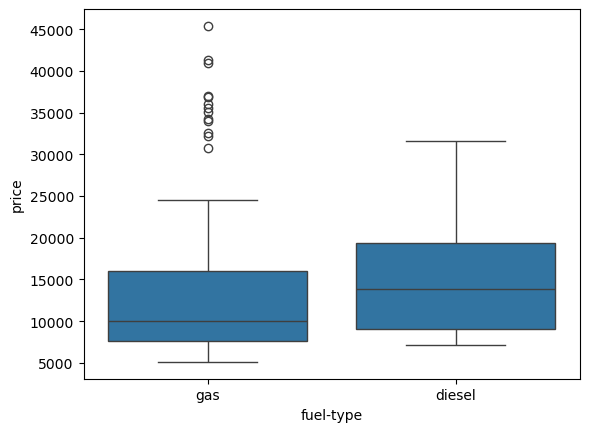

In [609]:
sns.boxplot(x='fuel-type', y='price', data=df)


In [571]:
df['num-of-doors']=='four'

num-of-doors
four    116
two      86
Name: count, dtype: int64

<Axes: xlabel='num-of-doors', ylabel='price'>

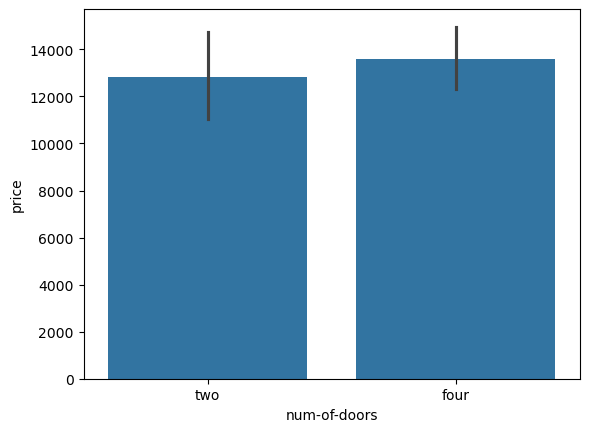

In [573]:
sns.barplot(x=df['num-of-doors'],y=df['price'])

# EDA

In [5]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [567]:
df.nunique()

symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           2
body-style             5
drive-wheels           3
engine-location        2
wheel-base            52
length                73
width                 43
height                49
curb-weight          169
engine-type            6
num-of-cylinders       7
engine-size           43
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            59
peak-rpm              23
city-mpg              29
highway-mpg           30
price                186
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          202 non-null    int64  
 1   normalized-losses  202 non-null    float64
 2   make               202 non-null    object 
 3   fuel-type          202 non-null    object 
 4   aspiration         202 non-null    object 
 5   num-of-doors       202 non-null    object 
 6   body-style         202 non-null    object 
 7   drive-wheels       202 non-null    object 
 8   engine-location    202 non-null    object 
 9   wheel-base         202 non-null    float64
 10  length             202 non-null    float64
 11  width              202 non-null    float64
 12  height             202 non-null    float64
 13  curb-weight        202 non-null    int64  
 14  engine-type        202 non-null    object 
 15  num-of-cylinders   202 non-null    object 
 16  engine-size        202 non

In [15]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,202.000000,165.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,0.831683,121.836364,98.848020,174.273267,65.903960,53.775248,2558.173267,126.945545,10.160990,25.148515,30.658416,13253.752475
std,1.258360,35.396412,6.094523,12.334330,2.106915,2.444769,517.236654,41.455269,3.995264,6.421956,6.809940,7954.919591
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.800000,64.125000,52.000000,2174.250000,98.000000,8.600000,19.000000,25.000000,7778.250000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2417.000000,120.000000,9.000000,24.000000,30.000000,10320.000000
75%,2.000000,150.000000,102.400000,183.500000,66.825000,55.500000,2932.750000,141.000000,9.400000,30.000000,34.000000,16502.250000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


# Handleing Missing Values

In [25]:
normalized_losses_mean=df['normalized-losses'].mean()
df['normalized-losses'].fillna(normalized_losses_mean,inplace=True)

In [35]:
numofdoors_mode=df['num-of-doors'].mode()
df['num-of-doors'].fillna('four',inplace=True)

In [117]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(i)

make
fuel-type
aspiration
num-of-doors
body-style
drive-wheels
engine-location
engine-type
num-of-cylinders
fuel-system


# Convert Object to Numaric

In [273]:
object_numaric_clms=['bore','stroke','horsepower','peak-rpm']
for i in object_numaric_clms:
       df[i]=pd.to_numeric(df[i],errors = 'coerce')
       means=df[i].mean()
       df[i].fillna(means,inplace=True)      

C:\Users\Dream\AppData\Local\Temp\ipykernel_1768\1930020087.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(means,inplace=True)


In [275]:
x=df.drop('price',axis=1)
y=df.price

# Encoding and Scaling Using ColumnTransformer

In [277]:
catagorical_cols=['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']
numaric_cols=['symboling', 'normalized-losses','wheel-base', 'length', 'width', 'height', 'curb-weight','engine-size','bore', 'stroke','compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg','highway-mpg']
colms=catagorical_cols+numaric_cols

In [367]:
preprocessing=ColumnTransformer([
    ('catagorical',OrdinalEncoder(),catagorical_cols),
    ('numaric',StandardScaler(),numaric_cols)
])

pipe=Pipeline([
    ('preprocess',preprocessing),
])

pipe.fit(x,y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('catagorical',
                                                  OrdinalEncoder(),
                                                  ['make', 'fuel-type',
                                                   'aspiration', 'num-of-doors',
                                                   'body-style', 'drive-wheels',
                                                   'engine-location',
                                                   'engine-type',
                                                   'num-of-cylinders',
                                                   'fuel-system']),
                                                 ('numaric', StandardScaler(),
                                                  ['symboling',
                                                   'normalized-losses',
                                                   'wheel-base', 'length',
                                                   'width', 'height',
                                                   'curb-weight', 'engine-size',
                                                   'bore', 'stroke',
                                                   'compression-ratio',
                                                   'horsepower', 'peak-rpm',
                                                   'city-mpg',
                                                   'highway-mpg'])]))])

In [511]:
transform_x=pipe.transform(x)

In [513]:
new_x=pd.DataFrame(transform_x,columns=colms)

# Train-Test-Split

In [697]:
xtrain,xtest,ytrain,ytest=train_test_split(new_x,y,test_size=0.25,random_state=42)

In [699]:
xtrain.shape

(151, 25)

In [701]:
xtrain

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
175,19.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,3.0,5.0,1.727411,2.356689,0.666508,0.749912,0.854568,-0.727945,0.887339,1.065339,-0.234475,0.297666,-0.216038,1.547558,0.170113,-0.959800,-0.980179
5,1.0,1.0,0.0,1.0,3.0,1.0,0.0,2.0,1.0,5.0,0.930751,0.000000,0.156591,0.246001,0.188438,-0.276887,-0.099182,0.218958,-0.532318,0.456614,-0.416773,0.176134,0.800163,-0.959800,-0.832970
127,16.0,1.0,0.0,1.0,2.0,1.0,0.0,2.0,2.0,5.0,0.930751,0.000000,-0.452020,0.205363,0.331180,-1.343024,-0.190275,0.122228,0.472900,2.046093,-0.366589,0.000000,0.000000,-0.335389,0.050284
117,14.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,0.134091,1.008462,-0.846795,-1.379519,-1.001079,-1.302019,-1.145785,-0.893429,-1.351383,-0.083809,-0.190946,-0.953274,0.800163,0.913432,1.080747
73,11.0,1.0,0.0,1.0,2.0,1.0,0.0,2.0,2.0,1.0,0.930751,1.227941,-0.846795,-1.379519,-0.715595,-1.220009,-1.240755,-0.845064,-1.351383,-0.083809,-0.190946,-0.953274,0.800163,1.850049,1.522374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,13.0,1.0,0.0,0.0,4.0,2.0,0.0,1.0,2.0,5.0,-0.662569,0.000000,2.525238,2.001561,1.187633,2.019409,1.302104,-0.167959,0.472900,-0.210967,-0.441864,-0.173445,-0.249920,-0.959800,-0.980179
14,2.0,1.0,0.0,0.0,3.0,2.0,0.0,2.0,3.0,5.0,-0.662569,0.000000,0.765202,1.196929,0.473923,0.789250,1.302104,1.984267,1.068584,0.424824,-0.542232,2.112263,0.590146,-1.428108,-1.274597
92,12.0,1.0,0.0,1.0,2.0,1.0,0.0,2.0,2.0,1.0,0.134091,0.193255,-0.715203,-0.704928,-1.001079,-0.194877,-1.027558,-0.724153,-0.681239,0.106929,-0.190946,-0.926384,0.170113,0.913432,0.933538
179,20.0,1.0,0.0,1.0,3.0,1.0,0.0,2.0,2.0,5.0,0.930751,0.005131,-0.254633,-0.209145,-0.192207,0.789250,-0.676752,-0.433965,-0.532318,0.456614,-0.291314,-0.496133,0.275122,0.289022,0.491911


# Linear Regression

In [703]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [705]:
predt=lr.predict(xtest)
print(f'Accurecy Score : {r2_score(ytest,predt)}')
print('MAE:', mean_absolute_error(ytest, predt))
print('MSE:', mean_squared_error(ytest, predt))


Accurecy Score : 0.8433194757567155
MAE: 2747.906080742072
MSE: 16076388.875337534


# KNN

In [707]:
knn=KNeighborsRegressor()
knn.fit(xtrain,ytrain)

KNeighborsRegressor()

In [709]:
knn_predt=knn.predict(xtest)
print(f'Accurecy Score : {r2_score(ytest,knn_predt)}')
print('MAE:', mean_absolute_error(ytest, knn_predt))
print('MSE:', mean_squared_error(ytest, knn_predt))

Accurecy Score : 0.7277750282501164
MAE: 3082.066666666667
MSE: 27931962.370980393


# Random Forest

In [711]:
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)

RandomForestRegressor()

In [713]:
rf_predt=rf.predict(xtest)
print(f'Accurecy Score : {r2_score(ytest,rf_predt)}')
print('MAE:', mean_absolute_error(ytest, rf_predt))
print('MSE:', mean_squared_error(ytest, rf_predt))

Accurecy Score : 0.9395433447934223
MAE: 1705.5205718954248
MSE: 6203225.9841944035


# Ploting The Accurecy

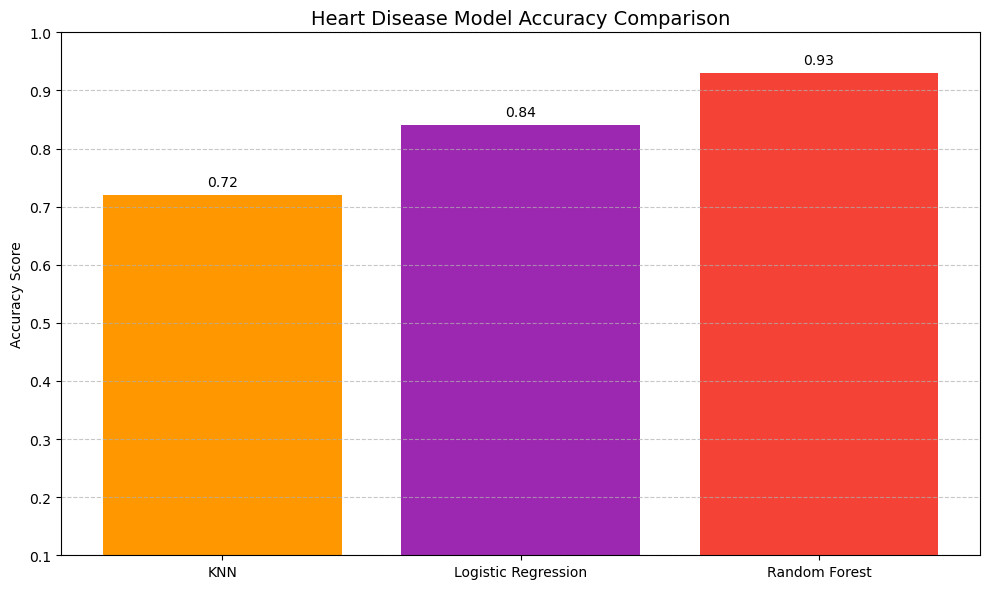

In [719]:
import matplotlib.pyplot as plt

# Data
models = ['KNN', 'Logistic Regression', 'Random Forest']
scores = [0.72, 0.84, 0.93]
colors = ['#FF9800', '#9C27B0', '#F44336']

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, scores, color=colors)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Customizations
plt.title('Heart Disease Model Accuracy Comparison', fontsize=14)
plt.ylabel('Accuracy Score')
plt.ylim(0.1, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# No legend needed since models are labeled
plt.tight_layout()
plt.show()